In [1]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import requests

In [66]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [ ]:
df = pd.read_csv('../notebooks/meth_v5.csv')

In [ ]:
df.shape

In [ ]:
df.columns[df.columns.str.contains("PROPERTY")]

In [ ]:
df['PROPERTY_ADDRESS'] = df['PROPERTY_ADDRESS'].astype('str')
df['PROPERTY_CITY'] = df['PROPERTY_CITY'].astype('str')
df['PROPERTY_STATE'] = df['PROPERTY_STATE'].astype('str')
df['PROPERTY_ZIPCODE'] = df['PROPERTY_ZIPCODE'].astype('str')

In [ ]:
df['PROP_ADD']=df['PROPERTY_ADDRESS']+','+df['PROPERTY_CITY']+','+df['PROPERTY_STATE']+','+df['PROPERTY_ZIPCODE']

In [ ]:
df['PROP_ADD'].nunique()

In [ ]:
for each_address in df['PROP_ADD'].unique():
    link='https://www.google.com/maps/place/'
    kk = each_address.replace(" ","+")
    kk = kk.replace(",",",+")
    link+=kk
    print(link)
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')
    break

In [ ]:
!pip install fiona

In [3]:
import geopandas as gpd
import pandas as pd

# Load the shapefile into a geopandas dataframe
da = gpd.read_file('./census_data/gz_2010_12_140_00_500k.shp')

# Convert the geopandas dataframe to a regular pandas dataframe
census_data = pd.DataFrame(da)



In [4]:
import geopandas as gpd
import pandas as pd

# Load the shapefile into a geopandas dataframe
da = gpd.read_file('./census_shape/tl_2010_12_bg10.shp')

# Convert the geopandas dataframe to a regular pandas dataframe
census_shape = pd.DataFrame(da)



In [5]:
census_data.shape,census_shape.shape

((4212, 8), (11442, 13))

In [6]:
census_data.shape,census_data.shape

((4212, 8), (4212, 8))

In [8]:
census_shape.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,12,037,970100,1,120379701001,Block Group 1,G5030,S,22239288,18516700,+29.8756745,-084.5807883,"POLYGON ((-84.64289 29.89453, -84.64286 29.894..."
1,12,037,970100,4,120379701004,Block Group 4,G5030,S,162912536,1488289,+29.9419366,-084.6721594,"POLYGON ((-84.64234 29.89663, -84.64245 29.896..."
2,12,037,970100,3,120379701003,Block Group 3,G5030,S,20837159,64976243,+29.7901093,-084.6226748,"POLYGON ((-84.66443 29.86646, -84.66443 29.866..."
3,12,037,970200,2,120379702002,Block Group 2,G5030,S,12918030,38794170,+29.7285408,-084.8948733,"POLYGON ((-84.88797 29.72366, -84.88799 29.723..."
4,12,017,451200,3,120174512003,Block Group 3,G5030,S,4522553,1594780,+28.7602315,-082.2792428,"POLYGON ((-82.26861 28.77522, -82.26854 28.775..."


In [66]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file('./json_file.geojson')

# # Convert the geometry column to latitude and longitude columns
# gdf['latitude'] = gdf.geometry.centroid.y
# gdf['longitude'] = gdf.geometry.centroid.x


In [72]:
gdf.shape,census_data.shape

((4245, 13), (4212, 9))

In [71]:
census_data.loc[census_data['GEO_ID'].str.startswith('1400000US')].shape

(4212, 9)

In [75]:
gdf['GEOID100']='1400000US'+gdf['GEOID10']

In [78]:
import json
import pandas as pd

# Assume your dataframe is named 'df' and has a 'geometry' column
# containing the GeoJSON geometries.

# # Convert the 'geometry' column to GeoJSON string format
# gdf['geometry'] = gdf['geometry'].apply(lambda x: json.loads(x))

# Create a feature collection dictionary
feature_collection = {
    "type": "FeatureCollection",
    "features": []
}

# Iterate over each row in the dataframe and create a GeoJSON feature
for index, row in df.iterrows():
    feature = {
        "type": "Feature",
        "geometry": row['geometry'],
        "properties": row.drop('geometry').to_dict()
    }
    feature_collection['features'].append(feature)

# Convert the feature collection dictionary to GeoJSON string format
geojson_str = json.dumps(feature_collection)


In [79]:
geojson_str

'{"type": "FeatureCollection", "features": []}'

In [12]:
census_data['STATE']=census_data['STATE'].astype('str')
census_data['COUNTY']=census_data['COUNTY'].astype('str')
census_data['TRACT']=census_data['TRACT'].astype('str')

In [13]:
census_data['GEOID10']=census_data['STATE']+census_data['COUNTY']+census_data['TRACT']

In [14]:
gdf['GEOID10'] = gdf['GEOID10'].astype('str')
census_data['GEOID10'] = census_data['GEOID10'].astype('str')

In [15]:
kk = gdf.merge(census_data,on='GEOID10',how='inner')

In [ ]:
kk.shape

In [31]:
kk['GEO_ID'].sample().values[0]

'1400000US12005002000'

In [36]:
l={}
for each_geoId in kk['GEO_ID'].unique():
    print(each_geoId)
    link = 'https://data.census.gov/profile?g='+each_geoId
    l[each_geoId]=link

1400000US12009068300
1400000US12009068400
1400000US12009068601
1400000US12009068502
1400000US12009068602
1400000US12009980000
1400000US12009071336
1400000US12009064123
1400000US12009066103
1400000US12009071335
1400000US12009069901
1400000US12009071100
1400000US12009068200
1400000US12009063102
1400000US12009062103
1400000US12009062400
1400000US12009062500
1400000US12009062600
1400000US12009062800
1400000US12009060700
1400000US12009066600
1400000US12009071600
1400000US12009071500
1400000US12009064700
1400000US12009068102
1400000US12009980100
1400000US12009067100
1400000US12009062900
1400000US12009063000
1400000US12009071200
1400000US12009066101
1400000US12009066200
1400000US12009066301
1400000US12009066302
1400000US12009071334
1400000US12011070314
1400000US12011030500
1400000US12011030801
1400000US12011060116
1400000US12009066400
1400000US12009066500
1400000US12009066700
1400000US12009066800
1400000US12009066900
1400000US12009065231
1400000US12009065234
1400000US12009064301
1400000US1201

In [38]:
for i in l.keys():
    kk.loc[kk['GEO_ID']==i,'URL']=l[i]

In [40]:
kk.to_excel('Inbuilt_websitge.xlsx',index=False)

In [43]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4212 entries, 0 to 4211
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   4212 non-null   object  
 1   COUNTYFP10  4212 non-null   object  
 2   TRACTCE10   4212 non-null   object  
 3   GEOID10     4212 non-null   object  
 4   NAME10      4212 non-null   object  
 5   NAMELSAD10  4212 non-null   object  
 6   MTFCC10     4212 non-null   object  
 7   FUNCSTAT10  4212 non-null   object  
 8   ALAND10     4212 non-null   int64   
 9   AWATER10    4212 non-null   int64   
 10  INTPTLAT10  4212 non-null   object  
 11  INTPTLON10  4212 non-null   object  
 12  geometry_x  4212 non-null   geometry
 13  latitude    4212 non-null   float64 
 14  longitude   4212 non-null   float64 
 15  GEO_ID      4212 non-null   object  
 16  STATE       4212 non-null   object  
 17  COUNTY      4212 non-null   object  
 18  TRACT       4212 non-null   object  
 19  NAME  

In [60]:
kk.drop(columns=['FUNCSTAT10'],inplace=True)

In [62]:
kk.rename(columns={'geometry_x':'GEOMETRY'},inplace=True)

In [63]:
kk.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GEOMETRY,latitude,longitude,GEO_ID,CENSUSAREA,URL
0,12,009,068300,12009068300,Census Tract 683,1886507,1893264,+28.3410296,-080.6080301,"MULTIPOLYGON (((-80.60550 28.32007, -80.60687 ...",28.342594,-80.606698,1400000US12009068300,0.728,https://data.census.gov/profile?g=1400000US120...
1,12,009,068400,12009068400,Census Tract 684,1699567,6242872,+28.3579064,-080.6330330,"MULTIPOLYGON (((-80.60214 28.35788, -80.60305 ...",28.365126,-80.624293,1400000US12009068400,0.656,https://data.census.gov/profile?g=1400000US120...
2,12,009,068601,12009068601,Census Tract 686.01,2981908,4187210,+28.4044135,-080.6306937,"MULTIPOLYGON (((-80.64618 28.40506, -80.64619 ...",28.398828,-80.626530,1400000US12009068601,1.151,https://data.census.gov/profile?g=1400000US120...
3,12,009,068502,12009068502,Census Tract 685.02,1021413,549457,+28.3860845,-080.5984860,"MULTIPOLYGON (((-80.59516 28.37972, -80.59896 ...",28.385913,-80.599243,1400000US12009068502,0.394,https://data.census.gov/profile?g=1400000US120...
4,12,009,068602,12009068602,Census Tract 686.02,3243209,1436745,+28.4023088,-080.6001604,"MULTIPOLYGON (((-80.63220 28.40926, -80.62712 ...",28.402788,-80.601644,1400000US12009068602,1.252,https://data.census.gov/profile?g=1400000US120...


In [64]:
kk.to_excel('final_file.xlsx',index=False)

In [ ]:
import requests

# Define API request parameters
api_key = "878ee88d1ba8458e418d5e503f720192a8a2eed0"
source = "acs"
year = "2019"
dataset = "acs/acs5"
base_url = f"https://api.census.gov/data/{year}/{dataset}"
state = "36"
county = "005"
tract = "101200"

# Construct the API request URL
variables = "B01001_001E"  # total population variable
api_url = f"{base_url}?get={variables}&for=tract:{tract}&in=state:{state}&in=county:{county}&key={api_key}"

# Send GET request to API URL
response = requests.get(api_url)

# Parse response data as JSON
data = response.json()
print(data)
# Extract total population from response
total_pop = int(data[1][0])
print(f"Total population: {total_pop}")


In [ ]:
import json
json_data = json.loads(response.json)

In [ ]:
response.content

In [20]:
import scrapy
from scrapy_selenium import SeleniumRequest

class CensusSpider(scrapy.Spider):
    name = 'census'
    allowed_domains = ['data.census.gov']

    def start_requests(self):
        yield SeleniumRequest(
            url='https://data.census.gov/profile?g=1400000US12009068300',
            wait_time=3,
            callback=self.parse
        )

    def parse(self, response):
        # Extract the population data
        population = response.xpath('//div[@class="data-value"]/text()')[0].get()
        print('Population:', population)

        # Extract the median age data
        median_age = response.xpath('//div[contains(text(), "Median age")]/following-sibling::div/text()')[0].get()
        print('Median age:', median_age)


In [80]:
df = pd.read_csv('Low_to_Moderate_Income_Population_by_Block_Group.csv')

/var/folders/0q/4w9_419s5jgfsk1krpn17gk00000gn/T/ipykernel_15499/2658733602.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Low_to_Moderate_Income_Population_by_Block_Group.csv')


In [101]:
df.iloc[0,:15]

OBJECTID                                                      1
GEOID                                               10010201001
Source                                                  2015ACS
geoname       Block Group 1, Census Tract 201, Autauga Count...
Stusab                                                       AL
Countyname                                       Autauga County
State                                                         1
County                                                        1
Tract                                                     20100
BLKGRP                                                        1
Low                                                         170
Lowmod                                                      230
Lmmi                                                        440
Lowmoduniv                                                  650
Lowmod_pct                                               0.3538
Name: 0, dtype: object

In [94]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file into a DataFrame
gdf = gpd.read_file('json_file.geojson')

# # Merge the two DataFrames using the primary key column
# merged_df = pd.merge(gdf, df, on='primary_key_column')

# # Convert the resulting DataFrame back into a GeoJSON file
# merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')
# merged_gdf.to_file('path/to/output/file.geojson', driver='GeoJSON')


In [95]:
gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,12,009,068300,12009068300,683,Census Tract 683,G5020,S,1886507,1893264,+28.3410296,-080.6080301,"MULTIPOLYGON (((-80.60550 28.32007, -80.60687 ..."
1,12,009,068400,12009068400,684,Census Tract 684,G5020,S,1699567,6242872,+28.3579064,-080.6330330,"MULTIPOLYGON (((-80.60214 28.35788, -80.60305 ..."
2,12,009,068601,12009068601,686.01,Census Tract 686.01,G5020,S,2981908,4187210,+28.4044135,-080.6306937,"MULTIPOLYGON (((-80.64618 28.40506, -80.64619 ..."
3,12,009,068502,12009068502,685.02,Census Tract 685.02,G5020,S,1021413,549457,+28.3860845,-080.5984860,"MULTIPOLYGON (((-80.59516 28.37972, -80.59896 ..."
4,12,009,068602,12009068602,686.02,Census Tract 686.02,G5020,S,3243209,1436745,+28.4023088,-080.6001604,"MULTIPOLYGON (((-80.63220 28.40926, -80.62712 ..."


In [4]:
d = pd.read_excel('ACS_2015_lowmod_blockgroup_all.xlsx')

In [7]:
d = d.loc[d['Stusab']=='FL']

In [11]:
d.loc[d['GEOID'].str.startswith('15000')].shape

(11442, 17)

In [17]:
d.shape

(11442, 17)

In [27]:
d['GEOIDD']=d['GEOID'].apply(lambda x: x.split('US')[-1])

In [28]:
d['GEOIDD']

40650    120010002001
40651    120010002002
40652    120010002003
40653    120010002004
40654    120010002005
             ...     
52087    121339703021
52088    121339703022
52089    121339703023
52090    121339703031
52091    121339703032
Name: GEOIDD, Length: 11442, dtype: object

In [14]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file('./blockgroup.geojson')

# # Convert the geometry column to latitude and longitude columns
# gdf['latitude'] = gdf.geometry.centroid.y
# gdf['longitude'] = gdf.geometry.centroid.x


In [16]:
gdf.shape

(11442, 13)

In [30]:
pk = d.merge(gdf,on='GEOIDD',how='inner')

In [29]:
gdf.rename(columns={'GEOID':'GEOIDD'},inplace=True)

In [31]:
pk.shape

(11442, 30)

In [48]:
pk.shape

(11442, 30)

In [59]:
pk.drop(columns=['Stusab','State','MTFCC','FUNCSTAT'],inplace=True)

In [63]:
pk['geoname'].iloc[0]

'Block Group 1, Census Tract 2, Alachua County, Florida'

In [65]:
pk['Tract'].unique()

array([   200,    301,    302, ..., 970103, 970104, 970303])

In [68]:
pk.drop(columns=['Blckgrp','County','MOE_LowmodPct','MOE_ucLowmodpct',
                'uclowmod','ucLowmod_pct'],inplace=True)

In [71]:
pk['geoname'].apply(lambda x: x.split(','))

0        [Block Group 1,  Census Tract 2,  Alachua Coun...
1        [Block Group 2,  Census Tract 2,  Alachua Coun...
2        [Block Group 3,  Census Tract 2,  Alachua Coun...
3        [Block Group 4,  Census Tract 2,  Alachua Coun...
4        [Block Group 5,  Census Tract 2,  Alachua Coun...
                               ...                        
11437    [Block Group 1,  Census Tract 9703.02,  Washin...
11438    [Block Group 2,  Census Tract 9703.02,  Washin...
11439    [Block Group 3,  Census Tract 9703.02,  Washin...
11440    [Block Group 1,  Census Tract 9703.03,  Washin...
11441    [Block Group 2,  Census Tract 9703.03,  Washin...
Name: geoname, Length: 11442, dtype: object

In [74]:
pk['NAMELSAD'].unique()

array(['Block Group 1', 'Block Group 2', 'Block Group 3', 'Block Group 4',
       'Block Group 5', 'Block Group 6', 'Block Group 0', 'Block Group 7',
       'Block Group 8', 'Block Group 9'], dtype=object)

In [82]:
mm = pk.groupby(['Countyname','NAMELSAD'])['GEOID'].count()
mm

Countyname         NAMELSAD     
Alachua County     Block Group 1    56
                   Block Group 2    43
                   Block Group 3    31
                   Block Group 4    17
                   Block Group 5     7
                                    ..
Walton County      Block Group 5     3
                   Block Group 6     2
Washington County  Block Group 1     7
                   Block Group 2     5
                   Block Group 3     3
Name: GEOID, Length: 379, dtype: int64

In [86]:
pk['Census_tract_name']=pk['geoname'].apply(lambda x: x.split(',')[1])

In [87]:
pk['Census_tract_name'].value_counts()

 Census Tract 2         42
 Census Tract 9900      37
 Census Tract 3         34
 Census Tract 102       27
 Census Tract 9.02      27
                        ..
 Census Tract 154.04     1
 Census Tract 9725       1
 Census Tract 9716       1
 Census Tract 110.14     1
 Census Tract 1.31       1
Name: Census_tract_name, Length: 2983, dtype: int64

In [88]:
pk['Tract'].value_counts()

200       42
990000    37
300       34
10200     27
902       27
          ..
15404      1
972500     1
971600     1
11014      1
131        1
Name: Tract, Length: 2983, dtype: int64

In [83]:
pk.head()

,GEOID,geoname,Countyname,Tract,Low,Lowmod,Lmmi,Lowmoduniv,Lowmod_pct,GEOIDD,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Type_of_community
0,15000US120010002001,"Block Group 1, Census Tract 2, Alachua County,...",Alachua County,200,220,235,370,385,0.6104,120010002001,12,001,000200,1,Block Group 1,396885,0,+29.6564537,-082.3297109,"MULTIPOLYGON (((-82.33058 29.65338, -82.33074 ...",LMI Community
1,15000US120010002002,"Block Group 2, Census Tract 2, Alachua County,...",Alachua County,200,800,950,1165,1430,0.6643,120010002002,12,001,000200,2,Block Group 2,428701,0,+29.6468570,-082.3296823,"MULTIPOLYGON (((-82.33310 29.64396, -82.33310 ...",LMI Community
2,15000US120010002003,"Block Group 3, Census Tract 2, Alachua County,...",Alachua County,200,1330,1345,1450,1450,0.9276,120010002003,12,001,000200,3,Block Group 3,368712,0,+29.6566349,-082.3360217,"MULTIPOLYGON (((-82.33714 29.65392, -82.33814 ...",LMI Community
3,15000US120010002004,"Block Group 4, Census Tract 2, Alachua County,...",Alachua County,200,645,760,775,795,0.9560,120010002004,12,001,000200,4,Block Group 4,381905,0,+29.6515009,-082.3346427,"MULTIPOLYGON (((-82.33922 29.65392, -82.33839 ...",LMI Community
4,15000US120010002005,"Block Group 5, Census Tract 2, Alachua County,...",Alachua County,200,430,450,465,480,0.9375,120010002005,12,001,000200,5,Block Group 5,85072,0,+29.6502494,-082.3382236,"MULTIPOLYGON (((-82.33714 29.65118, -82.33713 ...",LMI Community


In [93]:
api_key ='878ee88d1ba8458e418d5e503f720192a8a2eed0'

In [107]:
# import requests
# import pandas as pd

# # API key for the Census Bureau's API

# # State code for Florida
# state_code = "12"

# # Base URL for the API
# base_url = "https://api.census.gov/data/2019/acs/acs5"

# # Variables to retrieve from the API
# variables = ["B01003_001E", "GEO_ID"]

# # Build the API query URL for Florida Block Groups
# url = f"{base_url}?get={','.join(variables)}&for=block%20group:*&in=state:{state_code}"

# # Send the API request and get the response
# response = requests.get(url)

# # Convert the response to a pandas dataframe
# df = pd.DataFrame(response.json()[1:], columns=response.json()[0])

# # Rename the columns for better readability
# df = df.rename(columns={"B01003_001E": "Population", "GEO_ID": "Geo ID", "state": "State Code", "county": "County Code", "tract": "Census Tract", "block group": "Block Group"})

# # Show the first 10 rows of the dataframe
# print(df.head(10))


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [113]:
pk.groupby(['Countyname','NAMELSAD','Type_of_community'])['GEOID'].count()

Countyname         NAMELSAD       Type_of_community
Alachua County     Block Group 1  LMI Community        29
                                  Non-LMI Community    27
                   Block Group 2  LMI Community        21
                                  Non-LMI Community    22
                   Block Group 3  LMI Community        13
                                                       ..
Washington County  Block Group 1  Non-LMI Community     6
                   Block Group 2  LMI Community         1
                                  Non-LMI Community     4
                   Block Group 3  LMI Community         1
                                  Non-LMI Community     2
Name: GEOID, Length: 636, dtype: int64

In [49]:
pk['Type_of_community']=np.where(pk['Lowmod_pct']>=0.51,'LMI Community','Non-LMI Community')

In [119]:
pk.loc[(pk['Countyname']=='Alachua County') & (pk['NAMELSAD']=='Block Group 1')& (pk['Type_of_community']=='LMI Community'),'Lowmod_pct'].mean()

0.6907172413793103

In [122]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(pk, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output2.geojson', 'w') as f:
    f.write(geojson_str)


In [121]:
pk.to_csv('Final_data.csv',index=False)

In [123]:
import requests

url = 'https://data.census.gov/profile?g=1400000US12005002000'
response = requests.get(url)

html_content = response.content


In [150]:
import requests

# Set up API endpoint and parameters
base_url = 'https://api.census.gov/data'
year = '2019'
dataset = 'acs/acs5'
base_url = f"{base_url}/{year}/{dataset}"
get_vars = ['B01003_001E', 'B19013_001E', 'B17001_002E', 'B25003_001E']
state_fips = '12'
county_fips = '*'
tract = '*'
api_key = '878ee88d1ba8458e418d5e503f720192a8a2eed0'
url = f"{base_url}?get={','.join(get_vars)}&for=block%20group:{tract}&in=state:{state_fips}%20county:{county_fips}&key={api_key}"

# Make API request
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    # Convert response to list of dictionaries and print results
    data = response.json()
else:
    print(f"Error: {response.status_code}")


In [141]:
url

'https://api.census.gov/data/2019/acs/acs5?get=B01003_001E,B19013_001E,B17001_002E,B25003_001E&for=block%20group:*&in=state:12%20county:001&key=878ee88d1ba8458e418d5e503f720192a8a2eed0'

In [151]:
response

<Response [200]>

In [152]:
import pandas as pd

# Convert response to list of dictionaries
# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Print first 5 rows of DataFrame


In [128]:
response

<Response [400]>

In [155]:
import pandas as pd

# Convert response to list of dictionaries and create DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Rename columns
df = df.rename(columns={
    'B01003_001E': 'Total Population',
    'B19013_001E': 'Median Household Income',
    'B17001_002E': 'Poverty Count',
    'B25003_001E': 'Total Housing Units'
})

# Print first few rows of DataFrame



In [157]:
df.to_csv('pop_income_housing.csv',index=False)

In [159]:
d = pd.read_csv('../Team 4/pop_income_housing.csv')

In [161]:
d.head()

,Total Population,Median Household Income,Poverty Count,Total Housing Units,state,county,tract,block group
0,834,24923,NaN,270,12,1,200,1
1,1270,-666666666,NaN,548,12,1,200,2
2,1306,30082,NaN,448,12,1,200,3
3,784,13559,NaN,239,12,1,200,4
4,559,6662,NaN,339,12,1,200,5


In [212]:
import geopandas as gpd

# read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('./output1.geojson')

# convert the GeoDataFrame to a Pandas DataFrame
# df = gdf.drop('geometry', axis=1)
# df['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)


In [214]:
d.head()

,Total Population,Median Household Income,Total Housing Units,County,Tract,Blckgrp
0,834,24923,270,1,200,1
1,1270,-666666666,548,1,200,2
2,1306,30082,448,1,200,3
3,784,13559,239,1,200,4
4,559,6662,339,1,200,5


In [172]:
d.drop(columns=['state'],inplace=True)

In [189]:
d.rename(columns={'county':'County'},inplace=True)
d.rename(columns={'tract':'Tract'},inplace=True)
d.rename(columns={'block group':'Blckgrp'},inplace=True)

In [185]:
d['Tract'].nunique(),df['Tract'].nunique()

(2983, 2983)

In [186]:
d['block group'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8, 9])

In [188]:
df['Blckgrp'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8, 9])

In [215]:
df= gdf.copy()

In [216]:
df.shape,d.shape

((11442, 32), (11442, 6))

In [217]:
df.drop(columns=['id','Stusab','State','uclowmod','MOE_LowmodPct',
                'MOE_ucLowmodpct','STATEFP','COUNTYFP','TRACTCE','MTFCC',
                'FUNCSTAT'],inplace=True)

In [218]:
df.drop(columns=['ucLowmod_pct'],inplace=True)

In [220]:
# d.drop(columns=['Poverty Count'],inplace=True)

In [222]:
mla1= d.merge(df,on=['County','Tract','Blckgrp'],how='inner')

In [223]:
mla1.shape,d.shape,df.shape

((11442, 23), (11442, 6), (11442, 20))

In [224]:
mla.iloc[0,:]

Total Population                                                         834
Median Household Income                                                24923
Total Housing Units                                                      270
County                                                                     1
Tract                                                                    200
Blckgrp                                                                    1
GEOID                                                    15000US120010002001
geoname                    Block Group 1, Census Tract 2, Alachua County,...
Countyname                                                    Alachua County
Low                                                                      220
Lowmod                                                                   235
Lmmi                                                                     370
Lowmoduniv                                                               385

In [226]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(mla1, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output4.geojson', 'w') as f:
    f.write(geojson_str)


In [43]:
import geopandas as gpd

# read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('./output4.geojson')

# convert the GeoDataFrame to a Pandas DataFrame
# df = gdf.drop('geometry', axis=1)
# df['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)


In [44]:
mla = gdf.copy()

In [46]:
mla.columns

Index(['id', 'Total Population', 'Median Household Income',
       'Total Housing Units', 'County', 'Tract', 'Blckgrp', 'GEOID', 'geoname',
       'Countyname', 'Low', 'Lowmod', 'Lmmi', 'Lowmoduniv', 'Lowmod_pct',
       'GEOIDD', 'BLKGRPCE', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Type_of_community', 'geometry'],
      dtype='object')

In [47]:
mla.groupby(['Countyname','Blckgrp','Type_of_community'])['Total Population'].mean()

Countyname         Blckgrp  Type_of_community
Alachua County     1        LMI Community        1742.068966
                            Non-LMI Community    2007.740741
                   2        LMI Community        1430.761905
                            Non-LMI Community    1799.500000
                   3        LMI Community        1549.153846
                                                    ...     
Washington County  1        Non-LMI Community    1940.500000
                   2        LMI Community        1845.000000
                            Non-LMI Community    1220.000000
                   3        LMI Community        3514.000000
                            Non-LMI Community     870.000000
Name: Total Population, Length: 636, dtype: float64

In [48]:
mla['Median Household Income'].min()

-666666666

In [49]:
d={}
for each_county in mla['Countyname'].unique():
    namelsad_list=mla.loc[mla['Countyname']==each_county,'NAMELSAD'].unique()
    for each_blockgroup in namelsad_list:
        val = mla.loc[(mla['Countyname']==each_county) & (mla['NAMELSAD']==each_blockgroup) & (mla['Median Household Income']>0),'Median Household Income'].median()
        d[(each_county,each_blockgroup)]= val

In [50]:

for each_county in mla['Countyname'].unique():
    namelsad_list=mla.loc[mla['Countyname']==each_county,'NAMELSAD'].unique()
    for each_blockgroup in namelsad_list:
        mla.loc[(mla['Median Household Income']<0) & (mla['Countyname']==each_county) & (mla['NAMELSAD']==each_blockgroup),'Median Household Income']=d[(each_county,each_blockgroup)]

In [51]:
mla['Median Household Income'].isna().sum()

50

In [53]:
mla.loc[mla['Median Household Income'].isna(),].shape

(0, 24)

In [52]:
for each_county in mla['Countyname'].unique():
    kk = mla.loc[(mla['Median Household Income']>0) & (mla['Countyname']==each_county),'Median Household Income'].median()
    print(kk)
    mla.loc[(mla['Median Household Income'].isna()) & (mla['Countyname']==each_county),'Median Household Income']=kk

49321.5
66184.5
53026.5
48790.0
55250.0
60135.0
43997.5
52308.0
42212.0
61625.0
66915.5
45231.5
37720.5
39652.5
52111.0
51831.5
54632.0
45347.0
41480.0
39006.0
42358.5
52538.0
38482.0
35916.0
42162.5
50356.0
39737.0
57045.0
41726.0
54850.0
41832.0
44519.5
51625.0
48948.0
55938.0
51851.0
36283.0
38829.5
33957.5
52857.0
43100.0
61318.5
52760.0
72500.0
69107.0
63654.0
44408.0
55825.0
48358.0
63264.0
47045.0
54957.0
48242.5
40750.0
72947.75
50074.0
65385.0
61438.0
66343.0
42559.5
48926.0
40713.0
44397.0
49163.0
62219.5
50372.0
36371.0


In [55]:
mla.shape

(11442, 24)

In [56]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(mla, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output5.geojson', 'w') as f:
    f.write(geojson_str)


In [ ]:
import requests

# Set up API endpoint and parameters
base_url = 'https://api.census.gov/data'
year = '2019'
dataset = 'acs/acs5'
base_url = f"{base_url}/{year}/{dataset}"
get_vars = ['B01003_001E', 'B19013_001E', 'B17001_002E', 'B25003_001E']
state_fips = '12'
county_fips = '*'
tract = '*'
api_key = '878ee88d1ba8458e418d5e503f720192a8a2eed0'
url = f"{base_url}?get={','.join(get_vars)}&for=block%20group:{tract}&in=state:{state_fips}%20county:{county_fips}&key={api_key}"

# Make API request
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    # Convert response to list of dictionaries and print results
    data = response.json()
else:
    print(f"Error: {response.status_code}")


In [122]:
import requests
import pandas as pd

# Set up API endpoint and parameters
base_url = 'https://api.census.gov/data'
year = '2019'
dataset = 'acs/acs5'
base_url = f"{base_url}/{year}/{dataset}"
state_fips = '12'
county_fips = '*'
tract = '*'
block_group = '*'
api_key = '878ee88d1ba8458e418d5e503f720192a8a2eed0'

# Set variables to retrieve racial demographics information
get_vars = [
    'B02001_001E',  # Total population
    'B02001_002E',  # White alone
    'B03002_012E',  # latino and Hispanic
    'B02001_003E',  # Black or African American alone
    'B02001_004E',  # American Indian and Alaska Native alone
    'B02001_005E',  # Asian alone
    'B02001_006E',  # Native Hawaiian and Other Pacific Islander alone
    'B02001_007E',  # Some other race alone
    'B02001_008E',  # Two or more races
]

# Build API request URL
url = f"{base_url}?get={','.join(get_vars)}&for=block%20group:{block_group}&in=state:{state_fips}%20county:{county_fips}%20tract:{tract}&key={api_key}"

# Make API request
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    # Convert response to list of dictionaries and create pandas dataframe
    data = response.json()[1:]
    columns = ['total_pop', 'white_alone','latino_hispanic','black_alone', 'ai_an_alone', 'asian_alone', 'nhopi_alone', 'some_other_race_alone', 'two_or_more_races','state','county','tract','blockgroup']
    df = pd.DataFrame(data, columns=columns)
    # Convert columns from string to numeric
    df = df.apply(pd.to_numeric)
    # # Calculate percentages of each racial group
    # for col in columns[1:]:
    #     df[f"{col}_pct"] = df[col] / df['total_pop'] * 100
    # # Print dataframe
    print(df.head())
else:
    print(f"Error: {response.status_code}")


   total_pop  white_alone  latino_hispanic  black_alone  ai_an_alone  \
0        709          123               46          586            0   
1       1814         1350              161          354            0   
2       1075          920                0          155            0   
3       1891         1134              136          757            0   
4        613          354               17          170           89   

   asian_alone  nhopi_alone  some_other_race_alone  two_or_more_races  state  \
0            0            0                      0                  0     12   
1            6            0                    104                  0     12   
2            0            0                      0                  0     12   
3            0            0                      0                  0     12   
4            0            0                      0                  0     12   

   county   tract  blockgroup  
0      45  960200           3  
1     121  970500     

In [58]:
data

[['559', '486', '4', '0', '52', '0', '0', '17', '12', '001', '000200', '5'],
 ['4819',
  '3577',
  '841',
  '0',
  '35',
  '0',
  '23',
  '343',
  '12',
  '001',
  '002201',
  '2'],
 ['1685',
  '908',
  '560',
  '8',
  '19',
  '0',
  '14',
  '176',
  '12',
  '001',
  '002209',
  '2'],
 ['1254',
  '317',
  '693',
  '0',
  '99',
  '0',
  '0',
  '145',
  '12',
  '001',
  '000400',
  '2'],
 ['1921',
  '126',
  '1499',
  '0',
  '160',
  '1',
  '0',
  '135',
  '12',
  '001',
  '000400',
  '1'],
 ['1872',
  '789',
  '846',
  '22',
  '0',
  '0',
  '108',
  '107',
  '12',
  '001',
  '000400',
  '4'],
 ['339', '110', '229', '0', '0', '0', '0', '0', '12', '001', '000700', '1'],
 ['2345', '458', '1847', '0', '0', '0', '0', '40', '12', '001', '000700', '3'],
 ['2541',
  '963',
  '1403',
  '0',
  '0',
  '0',
  '175',
  '0',
  '12',
  '001',
  '000700',
  '4'],
 ['1302',
  '1067',
  '136',
  '67',
  '27',
  '0',
  '0',
  '5',
  '12',
  '001',
  '001000',
  '4'],
 ['713', '693', '0', '0', '0', '0', '2

In [59]:
url

'https://api.census.gov/data/2019/acs/acs5?get=B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=block%20group:*&in=state:12%20county:001%20tract:*&key=878ee88d1ba8458e418d5e503f720192a8a2eed0'

In [66]:
df.shape

(11442, 12)

In [67]:
df['county'].unique()

array([ 45, 121, 107, 115, 103,  86,  83, 101,  81,  11,  31,  85,  95,
        71,   9,  21,  17, 117,  41,  55,  53,  99,  69,   5,  61, 109,
        63,  23, 113, 133,  15,  57,  29, 125,   1,  33,  19,  73, 105,
        65, 129,  35, 111,  47,  91, 131,  97,  89,  75,  79, 127,  37,
        93, 123,  87, 119,  49,   7,  27,  39,  59,  13,   3,  43,  51,
        67,  77])

In [81]:
mla.columns

Index(['id', 'Total Population', 'Median Household Income',
       'Total Housing Units', 'County', 'Tract', 'Blckgrp', 'GEOID', 'geoname',
       'Countyname', 'Low', 'Lowmod', 'Lmmi', 'Lowmoduniv', 'Lowmod_pct',
       'GEOIDD', 'BLKGRPCE', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Type_of_community', 'geometry'],
      dtype='object')

In [82]:
df.columns

Index(['total_pop', 'white_alone', 'latino_hispanic', 'black_alone',
       'ai_an_alone', 'asian_alone', 'nhopi_alone', 'some_other_race_alone',
       'two_or_more_races', 'state', 'county', 'tract', 'blockgroup'],
      dtype='object')

In [89]:
df.rename(columns={'county':'County','tract':"Tract",'blockgroup':'Blckgrp'},inplace=True)

In [71]:
mla['Tract'].nunique(),df['tract'].nunique()

(2983, 2983)

In [85]:
mla['Blckgrp'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8, 9])

In [90]:
mp = df.merge(mla,on=['County','Tract','Blckgrp'],how='inner')

In [91]:
mp.shape

(11442, 34)

In [92]:
mp.head()

,total_pop,white_alone,latino_hispanic,black_alone,ai_an_alone,asian_alone,nhopi_alone,some_other_race_alone,two_or_more_races,state,...,Lowmod_pct,GEOIDD,BLKGRPCE,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,Type_of_community,geometry
0,709,123,46,586,0,0,0,0,0,12,...,0.5300,120459602003,3,Block Group 3,1932088,0,+29.8178767,-085.3037159,LMI Community,"MULTIPOLYGON (((-85.31336 29.82112, -85.31097 ..."
1,1814,1350,161,354,0,6,0,104,0,12,...,0.4174,121219705003,3,Block Group 3,105078271,427844,+30.1586700,-082.9331816,Non-LMI Community,"MULTIPOLYGON (((-82.98112 30.17533, -82.98136 ..."
2,1075,920,0,155,0,0,0,0,0,12,...,0.3377,121219701002,2,Block Group 2,24997207,776376,+30.2777486,-082.9146630,Non-LMI Community,"MULTIPOLYGON (((-82.94861 30.30311, -82.94831 ..."
3,1891,1134,136,757,0,0,0,0,0,12,...,0.2063,121219701001,1,Block Group 1,89864130,731014,+30.3396455,-082.8997839,Non-LMI Community,"MULTIPOLYGON (((-82.96222 30.33127, -82.96198 ..."
4,613,354,17,170,89,0,0,0,0,12,...,0.5568,121079507003,3,Block Group 3,564426,0,+29.6451051,-081.6533668,LMI Community,"MULTIPOLYGON (((-81.65794 29.64168, -81.65796 ..."


In [95]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(mp, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output6.geojson', 'w') as f:
    f.write(geojson_str)


In [97]:
mp.columns

Index(['total_pop', 'white_alone', 'latino_hispanic', 'black_alone',
       'ai_an_alone', 'asian_alone', 'nhopi_alone', 'some_other_race_alone',
       'two_or_more_races', 'state', 'County', 'Tract', 'Blckgrp', 'id',
       'Total Population', 'Median Household Income', 'Total Housing Units',
       'GEOID', 'geoname', 'Countyname', 'Low', 'Lowmod', 'Lmmi', 'Lowmoduniv',
       'Lowmod_pct', 'GEOIDD', 'BLKGRPCE', 'NAMELSAD', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Type_of_community', 'geometry'],
      dtype='object')

In [106]:
mp.groupby('Type_of_community')['latino_hispanic','black_alone','some_other_race_alone','Median Household Income'].mean()

/var/folders/0q/4w9_419s5jgfsk1krpn17gk00000gn/T/ipykernel_6632/684600842.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mp.groupby('Type_of_community')['latino_hispanic','black_alone','some_other_race_alone','Median Household Income'].mean()


,latino_hispanic,black_alone,some_other_race_alone,Median Household Income
Type_of_community,,,,
LMI Community,585.578057,447.425143,67.965943,41976.613143
Non-LMI Community,394.054054,198.322626,46.374416,72822.743314


In [107]:
mp.groupby(['Countyname','Type_of_community'])['GEOID'].count()

Countyname         Type_of_community
Alachua County     LMI Community        75
                   Non-LMI Community    80
Baker County       LMI Community         3
                   Non-LMI Community     9
Bay County         LMI Community        33
                                        ..
Wakulla County     Non-LMI Community    12
Walton County      LMI Community        17
                   Non-LMI Community    28
Washington County  LMI Community         3
                   Non-LMI Community    12
Name: GEOID, Length: 134, dtype: int64

In [109]:
lmi = mp.loc[mp['Type_of_community']=='LMI Community']

In [114]:
lmi.groupby('Countyname')['GEOID'].count().reset_index().sort_values(by='GEOID',ascending=False)

,Countyname,GEOID
42,Miami-Dade County,868
5,Broward County,426
49,Palm Beach County,354
27,Hillsborough County,332
14,Duval County,238
...,...,...
66,Washington County,3
17,Franklin County,2
62,Union County,2
37,Liberty County,1


In [117]:
mp.loc[(mp['Countyname']=='Alachua County') & (mp['Blckgrp']==2),'Type_of_community'].value_counts()

Non-LMI Community    22
LMI Community        21
Name: Type_of_community, dtype: int64

In [136]:
import requests

# Set up API endpoint and parameters
base_url = 'https://api.census.gov/data'
year = '2019'
dataset = 'acs/acs5'
base_url = f"{base_url}/{year}/{dataset}"
state_fips = '12'
county_fips = '*'
tract = '*'
block_group = '*'
api_key = '878ee88d1ba8458e418d5e503f720192a8a2eed0'

# Set variables to retrieve racial demographics information
get_vars = [
    'B25003_001E',  # total housing units
    'B25003_002E',  # occupied housing units
    'B25003_003E',  # owner occupied housing units
]

url = f"{base_url}?get={','.join(get_vars)}&for=block%20group:{block_group}&in=state:{state_fips}%20county:{county_fips}%20tract:{tract}&key={api_key}"

In [137]:
# Make API request
response = requests.get(url)


In [138]:
response

<Response [200]>

In [139]:
# Check if request was successful
if response.status_code == 200:
    # Convert response to list of dictionaries and print results
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")


[['B25003_001E', 'B25003_002E', 'B25003_003E', 'state', 'county', 'tract', 'block group'], ['366', '217', '149', '12', '045', '960200', '3'], ['613', '490', '123', '12', '121', '970500', '3'], ['345', '345', '0', '12', '121', '970100', '2'], ['674', '480', '194', '12', '121', '970100', '1'], ['254', '162', '92', '12', '107', '950700', '3'], ['424', '281', '143', '12', '107', '951000', '1'], ['643', '525', '118', '12', '107', '951000', '2'], ['762', '605', '157', '12', '107', '950400', '2'], ['341', '282', '59', '12', '107', '950400', '1'], ['230', '122', '108', '12', '107', '950800', '1'], ['281', '221', '60', '12', '107', '950800', '4'], ['301', '271', '30', '12', '107', '951200', '5'], ['407', '392', '15', '12', '107', '951200', '4'], ['464', '341', '123', '12', '107', '951200', '1'], ['770', '737', '33', '12', '115', '001801', '3'], ['769', '711', '58', '12', '115', '002201', '1'], ['757', '705', '52', '12', '115', '002201', '2'], ['360', '326', '34', '12', '115', '002202', '2'], ['

In [140]:
import pandas as pd

# Convert response to Pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Rename columns
df = df.rename(columns={
    'B25003_001E': 'total_housing_units',
    'B25003_002E': 'occupied_housing_units',
    'B25003_003E': 'owner_occupied_housing_units',
})


In [159]:
df['occupied_housing_units']=pd.to_numeric(df['occupied_housing_units'],errors='coerce')
df['owner_occupied_housing_units']=pd.to_numeric(df['owner_occupied_housing_units'],errors='coerce')
df['total_housing_units']=pd.to_numeric(df['total_housing_units'],errors='coerce')

In [160]:
# Calculate homeownership rate
df['homeownership_rate'] = df['owner_occupied_housing_units'] / df['total_housing_units']

<AxesSubplot: >

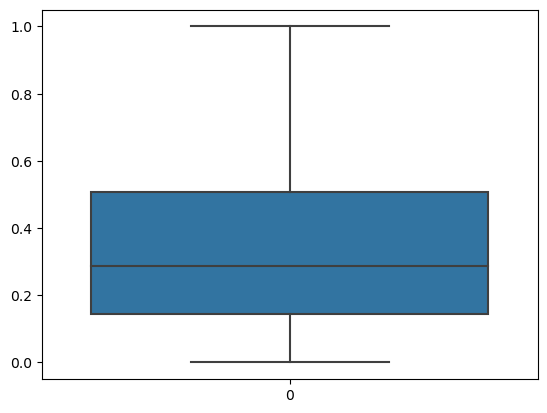

In [161]:
sns.boxplot(df['homeownership_rate'])

In [166]:
df['tract'].unique()

array(['960200', '970500', '970100', ..., '041304', '980900', '911302'],
      dtype=object)

In [167]:
df.shape

(11442, 8)

In [168]:
mp.shape

(11442, 34)

In [169]:
mp.columns

Index(['total_pop', 'white_alone', 'latino_hispanic', 'black_alone',
       'ai_an_alone', 'asian_alone', 'nhopi_alone', 'some_other_race_alone',
       'two_or_more_races', 'state', 'County', 'Tract', 'Blckgrp', 'id',
       'Total Population', 'Median Household Income', 'Total Housing Units',
       'GEOID', 'geoname', 'Countyname', 'Low', 'Lowmod', 'Lmmi', 'Lowmoduniv',
       'Lowmod_pct', 'GEOIDD', 'BLKGRPCE', 'NAMELSAD', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Type_of_community', 'geometry'],
      dtype='object')

In [170]:
df.columns

Index(['total_housing_units', 'occupied_housing_units',
       'owner_occupied_housing_units', 'state', 'county', 'tract',
       'block group', 'homeownership_rate'],
      dtype='object')

In [172]:
df.rename(columns={'county':'County','tract':'Tract','block group':"Blckgrp"},inplace=True)

In [175]:
df.dtypes

total_housing_units               int64
occupied_housing_units            int64
owner_occupied_housing_units      int64
state                            object
County                           object
Tract                            object
Blckgrp                          object
homeownership_rate              float64
dtype: object

In [177]:
df['state'] = df['state'].astype('int64')
df['County'] = df['County'].astype('int64')
df['Tract'] = df['Tract'].astype('int64')
df['Blckgrp'] = df['Blckgrp'].astype('int64')

In [178]:
cm = mp.merge(df,on=['County','Tract','Blckgrp'],how='inner')

In [179]:
cm.shape

(11442, 39)

In [180]:
cm

,total_pop,white_alone,latino_hispanic,black_alone,ai_an_alone,asian_alone,nhopi_alone,some_other_race_alone,two_or_more_races,state_x,...,AWATER,INTPTLAT,INTPTLON,Type_of_community,geometry,total_housing_units,occupied_housing_units,owner_occupied_housing_units,state_y,homeownership_rate
0,709,123,46,586,0,0,0,0,0,12,...,0,+29.8178767,-085.3037159,LMI Community,"MULTIPOLYGON (((-85.31336 29.82112, -85.31097 ...",366,217,149,12,0.407104
1,1814,1350,161,354,0,6,0,104,0,12,...,427844,+30.1586700,-082.9331816,Non-LMI Community,"MULTIPOLYGON (((-82.98112 30.17533, -82.98136 ...",613,490,123,12,0.200653
2,1075,920,0,155,0,0,0,0,0,12,...,776376,+30.2777486,-082.9146630,Non-LMI Community,"MULTIPOLYGON (((-82.94861 30.30311, -82.94831 ...",345,345,0,12,0.000000
3,1891,1134,136,757,0,0,0,0,0,12,...,731014,+30.3396455,-082.8997839,Non-LMI Community,"MULTIPOLYGON (((-82.96222 30.33127, -82.96198 ...",674,480,194,12,0.287834
4,613,354,17,170,89,0,0,0,0,12,...,0,+29.6451051,-081.6533668,LMI Community,"MULTIPOLYGON (((-81.65794 29.64168, -81.65796 ...",254,162,92,12,0.362205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437,1795,1644,1772,118,0,0,0,33,0,12,...,0,+25.7781539,-080.2187725,LMI Community,"MULTIPOLYGON (((-80.21480 25.77861, -80.21479 ...",649,12,637,12,0.981510
11438,2330,2155,1695,58,0,117,0,0,0,12,...,0,+25.7360581,-080.2537065,LMI Community,"MULTIPOLYGON (((-80.25418 25.73906, -80.25416 ...",991,260,731,12,0.737639
11439,1600,1410,1241,73,0,100,0,0,17,12,...,34392,+25.8193469,-080.2820881,Non-LMI Community,"MULTIPOLYGON (((-80.28454 25.81773, -80.28487 ...",459,150,309,12,0.673203
11440,321,154,277,90,0,0,0,0,77,12,...,18654,+25.7924755,-080.2418035,LMI Community,"MULTIPOLYGON (((-80.24036 25.79063, -80.24063 ...",115,0,115,12,1.000000


In [181]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(cm, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output7.geojson', 'w') as f:
    f.write(geojson_str)


In [185]:
cm.isna().sum()

total_pop                         0
white_alone                       0
latino_hispanic                   0
black_alone                       0
ai_an_alone                       0
asian_alone                       0
nhopi_alone                       0
some_other_race_alone             0
two_or_more_races                 0
state_x                           0
County                            0
Tract                             0
Blckgrp                           0
id                                0
Total Population                  0
Median Household Income           0
Total Housing Units               0
GEOID                             0
geoname                           0
Countyname                        0
Low                               0
Lowmod                            0
Lmmi                              0
Lowmoduniv                        0
Lowmod_pct                        0
GEOIDD                            0
BLKGRPCE                          0
NAMELSAD                    

In [186]:
d={}
for each_county in cm['Countyname'].unique():
    namelsad_list=cm.loc[cm['Countyname']==each_county,'NAMELSAD'].unique()
    for each_blockgroup in namelsad_list:
        val = cm.loc[(cm['Countyname']==each_county) & (cm['NAMELSAD']==each_blockgroup) & (cm['homeownership_rate'].notna()),'homeownership_rate'].mean()
        d[(each_county,each_blockgroup)]= val

for each_county in cm['Countyname'].unique():
    namelsad_list=cm.loc[cm['Countyname']==each_county,'NAMELSAD'].unique()
    for each_blockgroup in namelsad_list:
        cm.loc[(cm['homeownership_rate'].isna()) & (cm['Countyname']==each_county) & (cm['NAMELSAD']==each_blockgroup),'homeownership_rate']=d[(each_county,each_blockgroup)]

In [187]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11442 entries, 0 to 11441
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   total_pop                     11442 non-null  int64   
 1   white_alone                   11442 non-null  int64   
 2   latino_hispanic               11442 non-null  int64   
 3   black_alone                   11442 non-null  int64   
 4   ai_an_alone                   11442 non-null  int64   
 5   asian_alone                   11442 non-null  int64   
 6   nhopi_alone                   11442 non-null  int64   
 7   some_other_race_alone         11442 non-null  int64   
 8   two_or_more_races             11442 non-null  int64   
 9   state_x                       11442 non-null  int64   
 10  County                        11442 non-null  int64   
 11  Tract                         11442 non-null  int64   
 12  Blckgrp                       11442 non-null  

In [188]:
cm.isna().sum()

total_pop                        0
white_alone                      0
latino_hispanic                  0
black_alone                      0
ai_an_alone                      0
asian_alone                      0
nhopi_alone                      0
some_other_race_alone            0
two_or_more_races                0
state_x                          0
County                           0
Tract                            0
Blckgrp                          0
id                               0
Total Population                 0
Median Household Income          0
Total Housing Units              0
GEOID                            0
geoname                          0
Countyname                       0
Low                              0
Lowmod                           0
Lmmi                             0
Lowmoduniv                       0
Lowmod_pct                       0
GEOIDD                           0
BLKGRPCE                         0
NAMELSAD                         0
ALAND               

In [191]:
cm.loc[cm['homeownership_rate'].isna(),'Blckgrp'].unique()

array([0])

In [192]:
cm.shape

(11442, 39)

In [193]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(cm, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output8.geojson', 'w') as f:
    f.write(geojson_str)


In [194]:
cm.isna().sum()

total_pop                        0
white_alone                      0
latino_hispanic                  0
black_alone                      0
ai_an_alone                      0
asian_alone                      0
nhopi_alone                      0
some_other_race_alone            0
two_or_more_races                0
state_x                          0
County                           0
Tract                            0
Blckgrp                          0
id                               0
Total Population                 0
Median Household Income          0
Total Housing Units              0
GEOID                            0
geoname                          0
Countyname                       0
Low                              0
Lowmod                           0
Lmmi                             0
Lowmoduniv                       0
Lowmod_pct                       0
GEOIDD                           0
BLKGRPCE                         0
NAMELSAD                         0
ALAND               

In [195]:
cm['homeownership_rate'].mean()

0.34678552560773857

In [197]:
cm['homeownership_rate'] = cm['homeownership_rate'].fillna(cm['homeownership_rate'].mean())

In [198]:
cm['homeownership_rate'] = np.round(cm['homeownership_rate'],2)

In [201]:
cm['homeownership_rate']=cm['homeownership_rate']*100

In [203]:
cm.columns

Index(['total_pop', 'white_alone', 'latino_hispanic', 'black_alone',
       'ai_an_alone', 'asian_alone', 'nhopi_alone', 'some_other_race_alone',
       'two_or_more_races', 'state_x', 'County', 'Tract', 'Blckgrp', 'id',
       'Total Population', 'Median Household Income', 'Total Housing Units',
       'GEOID', 'geoname', 'Countyname', 'Low', 'Lowmod', 'Lmmi', 'Lowmoduniv',
       'Lowmod_pct', 'GEOIDD', 'BLKGRPCE', 'NAMELSAD', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Type_of_community', 'geometry',
       'total_housing_units', 'occupied_housing_units',
       'owner_occupied_housing_units', 'state_y', 'homeownership_rate'],
      dtype='object')

In [204]:
cm.drop(columns=['state_x','state_y','Total Population'],inplace=True)

In [206]:
cm.shape

(11442, 36)

In [208]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(cm, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output9.geojson', 'w') as f:
    f.write(geojson_str)


In [212]:
cm['pop_density']=(cm['total_pop']/cm['ALAND'])*100

0        0.036696
1        0.001726
2        0.004300
3        0.002104
4        0.108606
           ...   
11437    0.539837
11438    0.392058
11439    0.250196
11440    0.236976
11441    0.391342
Length: 11442, dtype: float64

In [261]:
import requests

# Set up API endpoint and parameters
base_url = 'https://api.census.gov/data'
year = '2019'
dataset = 'acs/acs5'
base_url = f"{base_url}/{year}/{dataset}"
state_fips = '12'
county_fips = '*'
tract = '*'
block_group = '*'
api_key = '878ee88d1ba8458e418d5e503f720192a8a2eed0'

# Set variables to retrieve racial demographics information
get_vars = [
    'B99072_001E'
]

url = f"{base_url}?get={','.join(get_vars)}&for=block%20group:{block_group}&in=state:{state_fips}%20county:{county_fips}%20tract:{tract}&key={api_key}"

In [262]:
# Make API request
response = requests.get(url)


In [264]:
response

<Response [200]>

In [265]:
data = response.json()

In [267]:
kk = pd.DataFrame(data[1:])

In [334]:
import requests

# Set up API endpoint and parameters
base_url = 'https://api.census.gov/data'
year = '2019'
dataset = 'acs/acs5'
base_url = f"{base_url}/{year}/{dataset}"
state_fips = '12'
county_fips = '*'
tract = '*'
block_group = '*'
api_key = '878ee88d1ba8458e418d5e503f720192a8a2eed0'

# Set variables to retrieve racial demographics information
get_vars = [
    'B25038_002E', # Number of owner-occupied housing units with a mortgage or a loan
    'B25038_003E'  # Number of owner-occupied housing units without a mortgage or a loan
    
]

url = f"{base_url}?get={','.join(get_vars)}&for=block%20group:{block_group}&in=state:{state_fips}%20county:{county_fips}%20tract:{tract}&key={api_key}"

In [335]:
response = requests.get(url)

# Convert response to list of lists
data = json.loads(response.text)

In [336]:
response

<Response [200]>

In [337]:
dp = pd.DataFrame(data[1:],columns=data[0])

In [339]:
dp['B25038_002E']=pd.to_numeric(dp['B25038_002E'],errors='coerce')

In [340]:
dp['B25038_003E']=pd.to_numeric(dp['B25038_003E'],errors='coerce')

In [341]:
dp.rename(columns={'B25038_002E':'with_Mortage','B25038_003E':'without_Mortage'},inplace=True)

In [342]:
dp['NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE']=dp['with_Mortage']+dp['without_Mortage']

In [344]:
dp.drop(columns=['with_Mortage','without_Mortage'],inplace=True)

In [345]:
dp

,state,county,tract,block group,NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE
0,12,045,960200,3,217
1,12,121,970500,3,490
2,12,121,970100,2,345
3,12,121,970100,1,480
4,12,107,950700,3,171
...,...,...,...,...,...
11437,12,086,005201,1,12
11438,12,086,007002,3,260
11439,12,086,004703,2,160
11440,12,086,005001,1,0


In [350]:
dp['county'] = pd.to_numeric(dp['county'],errors='coerce')
dp['tract'] = pd.to_numeric(dp['tract'],errors='coerce')
dp['block group'] = pd.to_numeric(dp['block group'],errors='coerce')

In [353]:
dp.drop(columns='state',inplace=True)

In [357]:
dp.rename(columns={'county':'County','tract':'Tract','block group':'Blckgrp'},inplace=True)

In [359]:
dp.shape

(11442, 4)

In [361]:
minister = cm.merge(dp,on=['County','Tract','Blckgrp'],how='inner')

In [362]:
minister.shape

(11442, 37)

In [363]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(minister, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output10.geojson', 'w') as f:
    f.write(geojson_str)


In [42]:
import geopandas as gpd

# read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('./output10.geojson')

# convert the GeoDataFrame to a Pandas DataFrame
# df = gdf.drop('geometry', axis=1)
# df['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)


In [43]:
import requests
import pandas as pd
import json

# set API endpoint and parameters
url = "https://api.census.gov/data/2019/acs/acs5"
params = {
    "get": "B23025_005E,B23025_003E",
    "for": "block group:*",
    "in": "state:12 county:*",
    "key": "878ee88d1ba8458e418d5e503f720192a8a2eed0"
}

# make API call and parse JSON data
response = requests.get(url, params=params)
data = json.loads(response.text)

# convert data to DataFrame and assign column names
df = pd.DataFrame(data[1:], columns=data[0])
df.columns = ["unemployed", "labor_force", "state", "county", "tract", "block_group"]

# calculate unemployment rate and convert to percentage
df["unemployment_rate"] = (df["unemployed"].astype(int) / df["labor_force"].astype(int)) * 100


In [44]:
df.shape

(11442, 7)

In [45]:
df.head()

,unemployed,labor_force,state,county,tract,block_group,unemployment_rate
0,16,423,12,045,960200,3,3.782506
1,24,841,12,121,970500,3,2.853746
2,0,554,12,121,970100,2,0.000000
3,19,701,12,121,970100,1,2.710414
4,16,265,12,107,950700,3,6.037736


In [46]:
df['unemployment_rate'] = df['unemployment_rate'].astype('float64')
df['unemployed'] = df['unemployed'].astype('int64')
df['labor_force'] = df['labor_force'].astype('int64')

In [47]:
df.drop(columns=['state'],inplace=True)

In [48]:
df['county'] =df['county'].astype('int64')
df['tract'] =df['tract'].astype('int64')
df['block_group'] =df['block_group'].astype('int64')

In [49]:
df.rename(columns={'county':"County","tract":"Tract","block_group":"Blckgrp"},inplace=True)

In [50]:
pm = gdf.merge(df,on=['County','Tract','Blckgrp'],how='inner')

In [51]:
pm.shape

(11442, 40)

In [52]:
import geopandas as gpd

# assume your dataframe is called 'df' and the geometry column is called 'geometry'
gdf = gpd.GeoDataFrame(pm, geometry='geometry')

# convert to geojson
geojson_str = gdf.to_json()

# write to file
with open('output11.geojson', 'w') as f:
    f.write(geojson_str)


In [54]:
lmi =pm.loc[pm['Type_of_community']=='LMI Community']

In [56]:
lmi.groupby(['Countyname'])['GEOIDD'].count().sort_values(ascending=False)

Countyname
Miami-Dade County      868
Broward County         426
Palm Beach County      354
Hillsborough County    332
Duval County           238
                      ... 
Washington County        3
Franklin County          2
Union County             2
Liberty County           1
Lafayette County         1
Name: GEOIDD, Length: 67, dtype: int64

In [59]:
pm.groupby(['Countyname'])['latino_hispanic'].mean().sort_values(ascending=False)

Countyname
Osceola County       2505.776316
Miami-Dade County    1159.927854
Orange County        1139.000000
Hendry County         875.520000
Broward County        610.945745
                        ...     
Jefferson County       53.090909
Dixie County           51.846154
Franklin County        49.538462
Gulf County            45.800000
Holmes County          36.400000
Name: latino_hispanic, Length: 67, dtype: float64

In [65]:
pm.groupby('Countyname')['ALAND'].mean().sort_values(ascending=False).head(10)

Countyname
Liberty County      3.606826e+08
Lafayette County    2.345714e+08
Glades County       1.898099e+08
Calhoun County      1.469389e+08
Jefferson County    1.408242e+08
Dixie County        1.404676e+08
Taylor County       1.351073e+08
Hamilton County     1.330711e+08
Baker County        1.263118e+08
Hendry County       1.194240e+08
Name: ALAND, dtype: float64

In [67]:
pm.loc[pm['total_pop']<pm['NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE']]

,total_pop,white_alone,latino_hispanic,black_alone,ai_an_alone,asian_alone,nhopi_alone,some_other_race_alone,two_or_more_races,County,...,Type_of_community,total_housing_units,occupied_housing_units,owner_occupied_housing_units,homeownership_rate,NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE,geometry,unemployed,labor_force,unemployment_rate


In [68]:
import seaborn as sns

<AxesSubplot: >

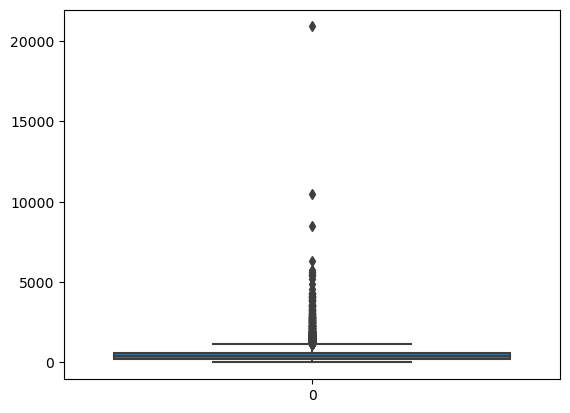

In [70]:
sns.boxplot(pm['NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE'])

In [94]:
pm.loc[pm['Countyname']=='Broward County','black_alone'].mean()

586.2734042553192

In [95]:
pm.loc[pm['Countyname']=='Miami-Dade County','black_alone'].mean()

294.3550815558344

In [75]:
pm.columns

Index(['total_pop', 'white_alone', 'latino_hispanic', 'black_alone',
       'ai_an_alone', 'asian_alone', 'nhopi_alone', 'some_other_race_alone',
       'two_or_more_races', 'County', 'Tract', 'Blckgrp', 'id',
       'Median Household Income', 'Total Housing Units', 'GEOID', 'geoname',
       'Countyname', 'Low', 'Lowmod', 'Lmmi', 'Lowmoduniv', 'Lowmod_pct',
       'GEOIDD', 'BLKGRPCE', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Type_of_community', 'total_housing_units',
       'occupied_housing_units', 'owner_occupied_housing_units',
       'homeownership_rate', 'NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE',
       'geometry', 'unemployed', 'labor_force', 'unemployment_rate'],
      dtype='object')

In [2]:
import geopandas as gpd

# read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('./output11.geojson')

# convert the GeoDataFrame to a Pandas DataFrame
# df = gdf.drop('geometry', axis=1)
# df['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)


In [4]:
df = pd.read_excel('Agencies_locations.xlsx')

In [5]:
df.head()

,Agency_name,Coordinates,Latitude,Longitude
0,first choice ins of fla,"(27.7745015, -82.63340389999999)",27.774501,-82.633404
1,o'brien insurance agency inc,"(28.9000469, -82.590693)",28.900047,-82.590693
2,"goosehead insurance agency, llc","(32.983065, -97.17327300000001)",32.983065,-97.173273
3,"sunshine insurance agency, inc","(25.7018732, -80.3569598)",25.701873,-80.356960
4,americana insurance inc.,"(25.6871347, -80.3650108)",25.687135,-80.365011


In [9]:
gdf['INTPTLAT']=pd.to_numeric(gdf['INTPTLAT'],errors='coerce')
gdf['INTPTLON']=pd.to_numeric(gdf['INTPTLON'],errors='coerce')

In [16]:
gdf.isna().sum()

total_pop                                         0
white_alone                                       0
latino_hispanic                                   0
black_alone                                       0
ai_an_alone                                       0
asian_alone                                       0
nhopi_alone                                       0
some_other_race_alone                             0
two_or_more_races                                 0
County                                            0
Tract                                             0
Blckgrp                                           0
id                                                0
Median Household Income                           0
Total Housing Units                               0
GEOID                                             0
geoname                                           0
Countyname                                        0
Low                                               0
Lowmod      

In [11]:
d={}
for each_county in gdf['Countyname'].unique():
    namelsad_list=gdf.loc[gdf['Countyname']==each_county,'NAMELSAD'].unique()
    for each_blockgroup in namelsad_list:
        val = gdf.loc[(gdf['Countyname']==each_county) & (gdf['NAMELSAD']==each_blockgroup) & (gdf['unemployment_rate'].notna()),'unemployment_rate'].mean()
        d[(each_county,each_blockgroup)]= val

for each_county in gdf['Countyname'].unique():
    namelsad_list=gdf.loc[gdf['Countyname']==each_county,'NAMELSAD'].unique()
    for each_blockgroup in namelsad_list:
        gdf.loc[(gdf['unemployment_rate'].isna()) & (gdf['Countyname']==each_county) & (gdf['NAMELSAD']==each_blockgroup),'unemployment_rate']=d[(each_county,each_blockgroup)]

In [13]:
gdf['unemployment_rate']=gdf['unemployment_rate'].fillna(gdf['unemployment_rate'].mean())

In [28]:
import geopy.distance
def calculate_distance(c1,c2):
    return geopy.distance.geodesic(c1,c2).miles

In [90]:
# d={}
# for each_agency in df.itertuples():
#     agency_coord = (each_agency[3],each_agency[4])
#     ls=[]
#     count=0
#     for each_blockgroup in gdf.itertuples():
#         blockgroup_coord = (each_blockgroup[29],each_blockgroup[30])
#         miles = calculate_distance(agency_coord,blockgroup_coord)
#         ls.append(miles)
#     index_blockgroup = np.argmin(ls)
#     count+=1
#     print(index_blockgroup)
#     d[(each_agency,each_blockgroup)] = (index_blockgroup,count)

In [108]:
gdf['Potential_customers']=np.where(gdf['NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE']<gdf['total_pop'],(gdf['total_pop']-gdf['NUMBER_OF_HOUSEHOLDS_WITH_HOMEOWNERS_INSURANCE']),0)